In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Analysing and visualization of the data.**

In [115]:
#loading the datasets
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [116]:
#shape of both train and test data
df.shape, test_df.shape

((100000, 76), (10000, 75))

In [117]:
#displaying head of the dataframe with all the columns
pd.options.display.max_columns= None
df.head()


,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

In [118]:
test_df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,1.0,1,218,129455.0,224.0,16,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,249148.0,4.0,5.0,3026.0,953869.0,HDD,134182.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,1.0,5,FullAuto,0,INVALID_LICENSE,Retail,0.0,Retail,486.0,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,2.0,1,68,138510.0,276.0,74,windows8,x64,6.3.0.0,9600,768,windows8.1,9600.19067.amd64fre.winblue_ltsb_escrow.180619...,Home,1.0,0,0.0,333.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189972.0,2.0,5.0,3403.0,715404.0,HDD,695042.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.14393.321,amd64,rs1_release,14393,321,Core,CORE,Update,7.0,30,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,556.0,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,1.0,1,141,154469.0,167.0,227,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,953869.0,HDD,931858.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,10.0,35,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,1.0,1,41,130775.0,240.0,217,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,0.0,117.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,171094.0,4.0,1.0,77.0,953869.0,HDD,455936.0,0,16384.0,Notebook,13.9,1920.0,1080.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,9.0,34,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,1.0,1,43,51125.0,53.0,42,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,35033.0,4.0,5.0,2289.0,715404.0,HDD,50001.0,0,4096.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.17134.112,amd64,rs4_release,17134,112,Professional,PROFESSIONAL,Upgrade,37.0,158

In [119]:
#checking columns of both train and test data. 
df.columns, test_df.columns

(Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
        'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
        'IsPassiveModeEnabled', 'AntivirusConfigID',
        'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
        'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
        'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
        'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
        'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
        'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
        'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
        'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID',
        'PrimaryDiskCapacityMB', 'PrimaryDiskType', 'SystemVolumeCapacityMB',
        'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'ChassisType',
        'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal',
        'PrimaryD

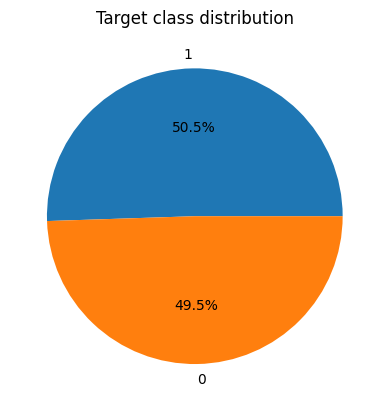

In [120]:
#checking whether target is balanced or imbalanced.
import matplotlib.pyplot as plt
tar_dist= df["target"].value_counts()

plt.pie(tar_dist, labels= tar_dist.index, autopct = '%1.1f%%')
plt.title('Target class distribution')
plt.show()

In [121]:
#to know data types and how many values present in each row.
df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [122]:
#to get the null values in train and test data, so that it can be imputed later.
pd.options.display.max_rows= None 
df.isnull().sum() 

MachineID                               0
ProductName                             0
EngineVersion                           0
AppVersion                              0
SignatureVersion                        0
IsBetaUser                              0
RealTimeProtectionState                66
IsPassiveModeEnabled                    0
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
HasTpm                                  0
CountryID                               0
CityID                                623
GeoRegionID                             0
LocaleEnglishNameID                     0
PlatformType                            0
Processor                               0
OSVersion                               0
OSBuildNumber                           0
OSProductSuite                          0
OsPlatformSubRelease                    0
OSBuildLab                              0
SKUEditionName                    

In [123]:
test_df.isnull().sum()

MachineID                              0
ProductName                            0
EngineVersion                          0
AppVersion                             0
SignatureVersion                       0
IsBetaUser                             0
RealTimeProtectionState                9
IsPassiveModeEnabled                   0
AntivirusConfigID                      2
NumAntivirusProductsInstalled          2
NumAntivirusProductsEnabled            2
HasTpm                                 0
CountryID                              0
CityID                                61
GeoRegionID                            1
LocaleEnglishNameID                    0
PlatformType                           0
Processor                              0
OSVersion                              0
OSBuildNumber                          0
OSProductSuite                         0
OsPlatformSubRelease                   0
OSBuildLab                             0
SKUEditionName                         0
IsSystemProtecte

In [124]:
#knowing the general statics of features
df.describe()


#here we can see that the features 'IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled' 
#has mean and std as 0, these features all have single values throughout all the rows.

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,target
count,100000.0,99934.000000,100000.000000,99924.000000,99924.000000,99924.000000,100000.000000,100000.000000,99377.000000,100000.000000,100000.000000,100000.000000,100000.000000,99924.000000,100000.0,99019.000000,99893.000000,99834.000000,99981.000000,99788.000000,99772.000000,99915.000000,99915.000000,99915.000000,9.989000e+04,9.989000e+04,100000.00000,99849.000000,99928.000000,99928.000000,99928.000000,9.948500e+04,100000.000000,100000.000000,99887.000000,100000.000000,100000.000000,99674.0,99624.000000,99666.000000,100000.000000,99980.000000,100000.000000,100000.000000,99866.000000,99441.000000,99441.000000,100000.000000
mean,0.0,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,15917.208720,578.403380,0.955326,0.0,0.000505,124.053848,0.980067,0.996569,2209.573265,238780.914154,4.011500,4.530711,2367.693069,5.158619e+05,3.819905e+05,0.08140,6132.087442,16.708674,1552.230416,898.253192,1.118069e+09,15990.596350,986.531360,14.519267,60.030870,0.000520,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866,0.505250
std,0.0,1.015166,0.131566,13803.321533,0.520681,0.155291,0.056654,63.062151,48944.027074,89.188929,69.242252,1943.421132,247.240971,0.206588,0.0,0.022466,33.535395,0.139771,0.266669,1300.863891,71708.483379,2.033075,1.288050,837.822392,3.525624e+05,3.246240e+05,0.27345,4813.882548,6.031598,363.438980,213.695880,1.884682e+09,1810.756601,2971.429862,10.142233,44.715508,0.022798,0.0,221.318891,21151.970827,0.499984,0.061855,0.334614,0.197316,0.234496,0.456791,4.562533,0.499975
min,0.0,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,7601.000000,16.000000,0.000000,0.0,0.000000,39.000000,0.000000,0.000000,46.000000,22.000000,1.000000,1.000000,3.000000,1.228800e+04,1.088000e+04,0.00000,512.000000,5.300000,400.000000,300.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36694.000000,89.000000,74.000000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208410e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,0.0,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,0.0,0.000000,135.000000,1.000000,1.000000,2102.000000,246528.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.567655e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000
75%,0.0,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122835.000000,267.000000,182

In [125]:
test_df.describe()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,10000.0,9991.000000,10000.000000,9998.00000,9998.000000,9998.000000,10000.00000,10000.000000,9939.000000,9999.000000,10000.00000,10000.000000,10000.000000,9998.000000,10000.0,9908.000000,9990.000000,9984.000000,10000.000000,9982.000000,9979.000000,9989.000000,9989.000000,9989.000000,9.990000e+03,9.990000e+03,10000.00000,9988.000000,9994.000000,9994.000000,9994.000000,9.946000e+03,10000.000000,10000.000000,9986.000000,10000.000000,10000.000000,9965.0,9968.000000,9971.000000,10000.000000,9993.000000,10000.000000,10000.000000,9988.000000,9938.000000,9938.000000
mean,0.0,6.848864,0.017400,48122.25075,1.327065,1.019004,0.99620,107.675900,80985.386055,168.507151,123.50300,15912.849500,577.947200,0.957692,0.0,0.000908,124.040541,0.981971,0.995000,2195.828591,238201.393025,4.007208,4.523175,2368.741816,5.154108e+05,3.793902e+05,0.07650,6150.151982,16.635391,1550.019212,897.198219,1.097277e+09,15986.587700,986.761700,14.689565,60.902600,0.000500,0.0,404.363864,33258.776853,0.505800,0.003202,0.131000,0.041200,0.056468,0.301067,7.906219
std,0.0,1.014203,0.130763,13611.92055,0.524149,0.157627,0.06153,63.268649,49085.060889,89.279554,69.76074,1939.189651,247.370759,0.201302,0.0,0.030127,33.857978,0.133062,0.070537,1291.726213,72020.841935,2.006434,1.297925,840.257504,3.482613e+05,3.162358e+05,0.26581,4536.675978,5.711076,356.275434,210.240813,1.873260e+09,1802.151077,2959.945273,10.237616,45.251103,0.022356,0.0,220.361535,21239.190886,0.499991,0.056501,0.337417,0.198762,0.230834,0.458745,4.522045
min,0.0,0.000000,0.000000,645.00000,1.000000,0.000000,0.00000,1.000000,41.000000,1.000000,2.00000,7601.000000,256.000000,0.000000,0.0,0.000000,41.000000,0.000000,0.000000,245.000000,180.000000,1.000000,1.000000,19.000000,1.480000e+04,1.314900e+04,0.00000,512.000000,5.500000,640.000000,400.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,93.000000,737.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,7.000000,0.000000,49480.00000,1.000000,1.000000,1.00000,50.000000,36164.000000,89.000000,74.00000,16299.000000,256.000000,1.000000,0.0,0.000000,111.000000,1.000000,1.000000,1443.000000,189547.000000,2.000000,5.000000,1998.000000,2.441980e+05,1.208420e+05,0.00000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,16299.000000,167.000000,8.000000,31.000000,0.000000,0.0,142.000000,13182.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.0,7.000000,0.000000,53447.00000,1.000000,1.000000,1.00000,97.000000,82373.000000,181.000000,88.00000,16299.000000,768.000000,1.000000,0.0,0.000000,117.000000,1.000000,1.000000,2102.000000,245824.000000,4.000000,5.000000,2503.000000,4.769400e+05,2.544800e+05,0.00000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,0.000000,0.0,500.000000,33075.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.0,7.000000,0.000000,53447.00000,2.000000,1.000000,1.00000,160.000000,122884.500000,258.000000,182.00000,17134.000000,768.000000,1.000000,0.0,0.000000,137.000000,1.000000,1.000000,2668.000000,302837.500000,4.000000,5.0000

In [151]:
#removing the duplicates from train data
df.duplicated().sum() 
df.drop_duplicates(inplace = True)
df.shape


(63233, 42)

In [127]:
#removing unecessary columns like MachineID, IsBetaUser etc
selected_columns = ["ProductName", "EngineVersion", 'AppVersion', 'SignatureVersion','RealTimeProtectionState', 'IsPassiveModeEnabled', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'HasTpm','ProcessorManufacturerID','Processor', 'ProcessorCoreCount', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges','GeoRegionID', 'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OSBranch', 'OSArchitecture', 'OSBuildLab', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel',  'FlightRing', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'DateAS', 'DateOS','target']
df = df[selected_columns]

test_selected_columns = ["ProductName", "EngineVersion", 'AppVersion', 'SignatureVersion','RealTimeProtectionState', 'IsPassiveModeEnabled', 'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled', 'IsSystemProtected', 'SMode', 'FirewallEnabled', 'HasTpm','ProcessorManufacturerID','Processor', 'ProcessorCoreCount', 'HasOpticalDiskDrive', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges','GeoRegionID', 'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OSBranch', 'OSArchitecture', 'OSBuildLab', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'DateAS', 'DateOS']
test_df = test_df[test_selected_columns]

In [128]:
#storing numerical and categorical columns separately.

num_cols = ['NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled','ProcessorCoreCount', 'TotalPhysicalRAMMB', 'InternalBatteryNumberOfCharges']

cat_cols = ['ProductName', 'EngineVersion', 'AppVersion', 'SignatureVersion', 'RealTimeProtectionState','IsPassiveModeEnabled','IsSystemProtected', 'SMode', 'FirewallEnabled', 'HasTpm', 'ProcessorManufacturerID', 'Processor', 'HasOpticalDiskDrive', 'GeoRegionID', 'OSVersion', 'OSBuildNumber', 'OSProductSuite', 'OSBranch', 'OSArchitecture', 'OSBuildLab', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'IsPortableOS', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'IsSecureBootEnabled', 'IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'DateAS', 'DateOS']

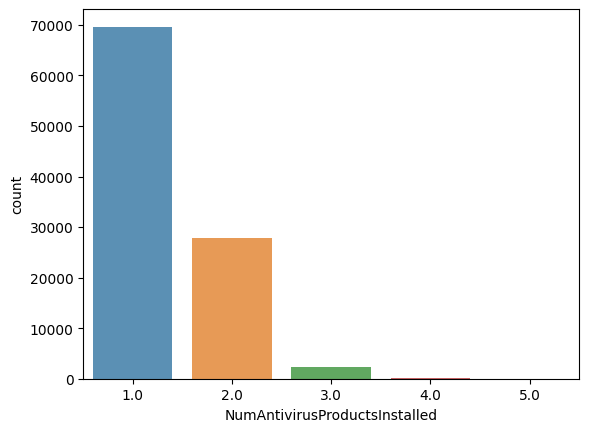

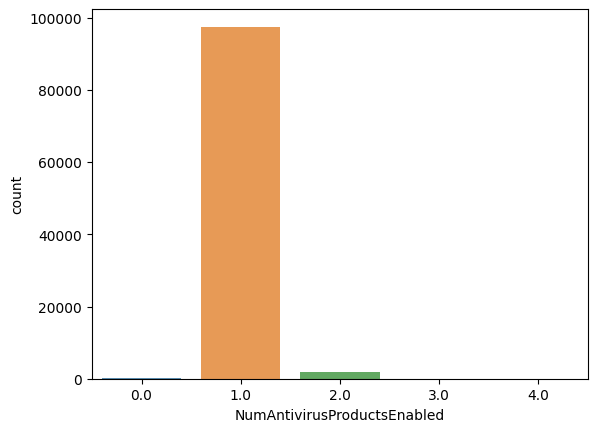

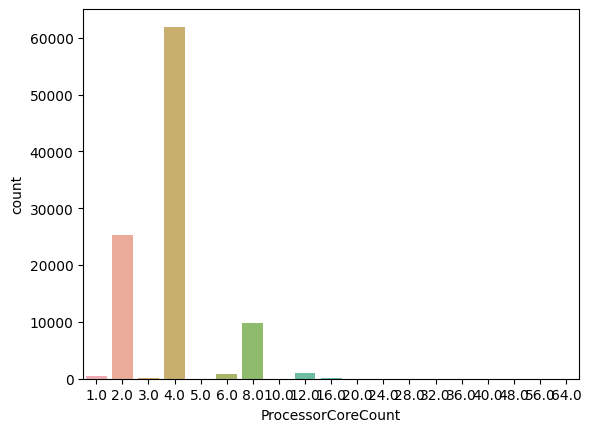

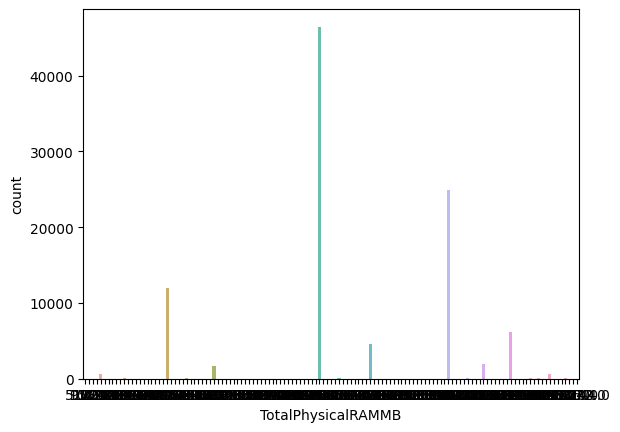

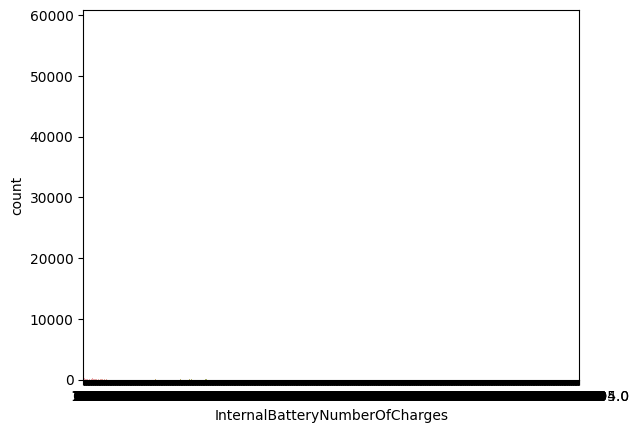

In [129]:
#using countplot to see the distribution of numerical values.
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

for col in num_cols:
    sns.countplot(data= df, x= col, alpha = 0.8, linewidth = 1.2) 
    plt.show()

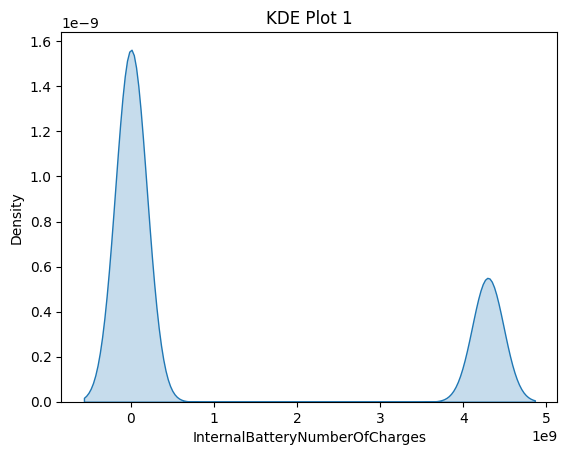

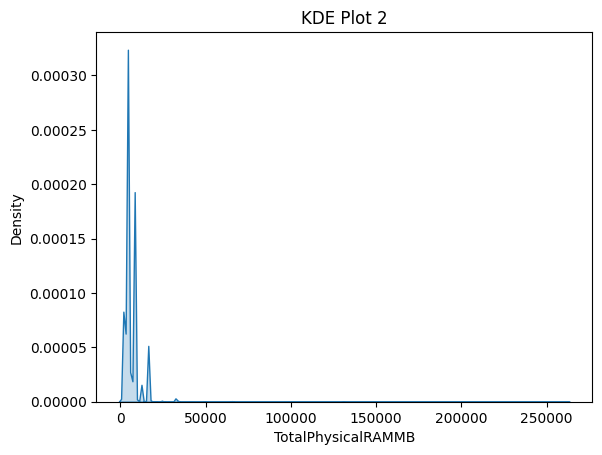

In [130]:
#using kernel density estimation plot since these featurea had too many unique values.
sns.kdeplot(df['InternalBatteryNumberOfCharges'], shade=True)
plt.title("KDE Plot 1")
plt.show()

sns.kdeplot(df['TotalPhysicalRAMMB'], shade=True)
plt.title("KDE Plot 2")
plt.show()

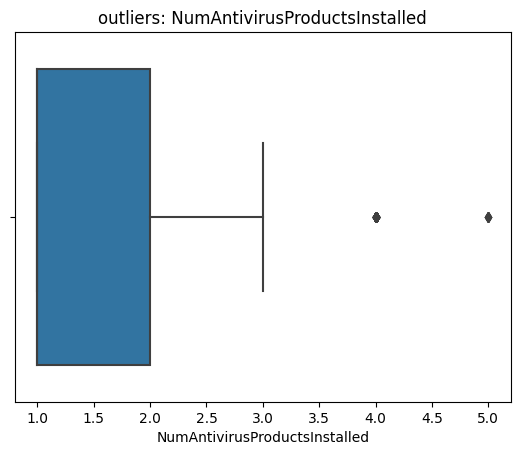

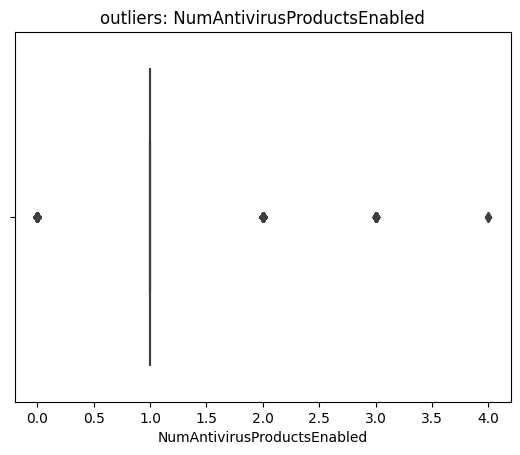

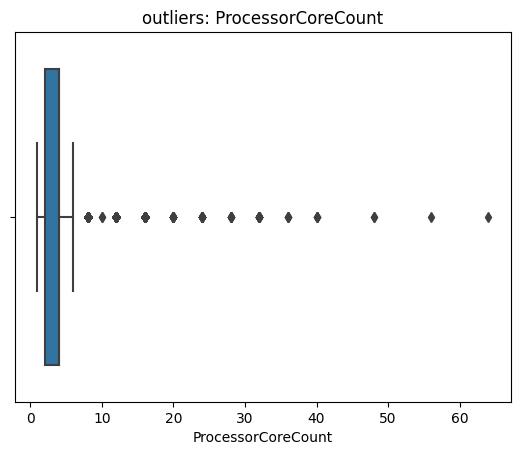

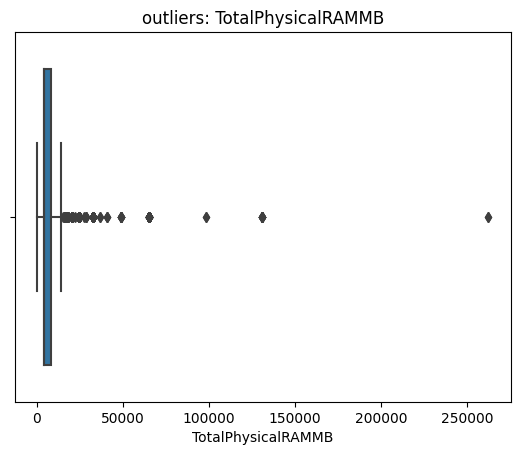

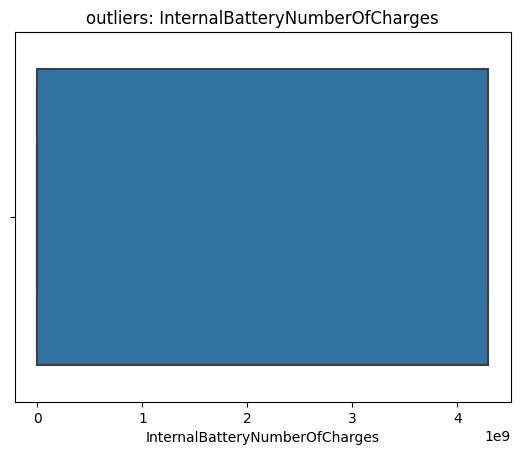

In [131]:
#outliers detection using boxplot
for col in num_cols:
    sns.boxplot(x = df[col])
    plt.title(f"outliers: {col}")
    plt.show()

In [132]:
#removing outliers using bounds.
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5* iqr 
    upper_bound = 1.5* iqr + q3
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for col in num_cols:
    df = remove_outliers(df, col)

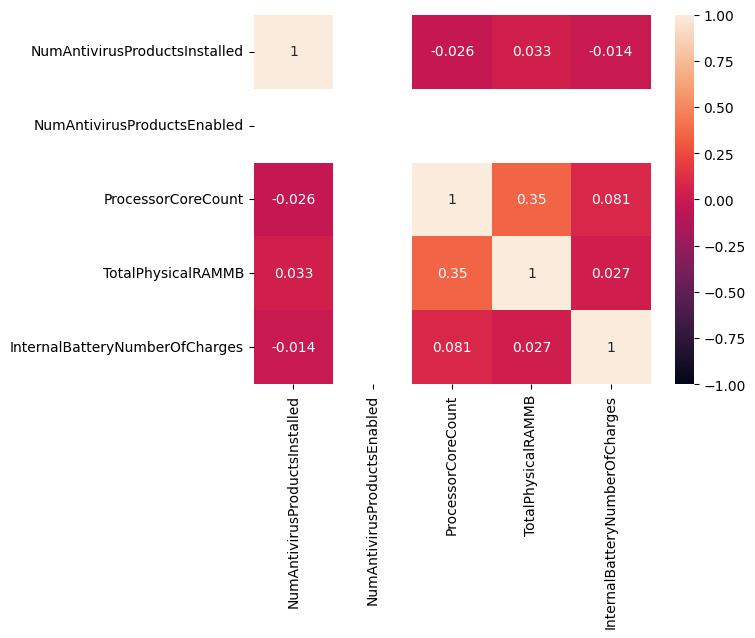

In [133]:
#finding whether 2 columns is highly correlated.
correlation_matrix = df[num_cols].corr()

sns.heatmap(correlation_matrix, annot = True, vmin= -1, vmax= 1)
plt.show()

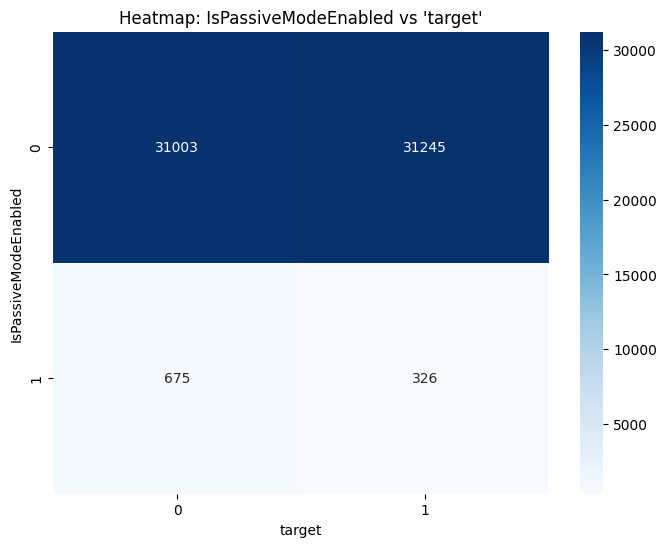

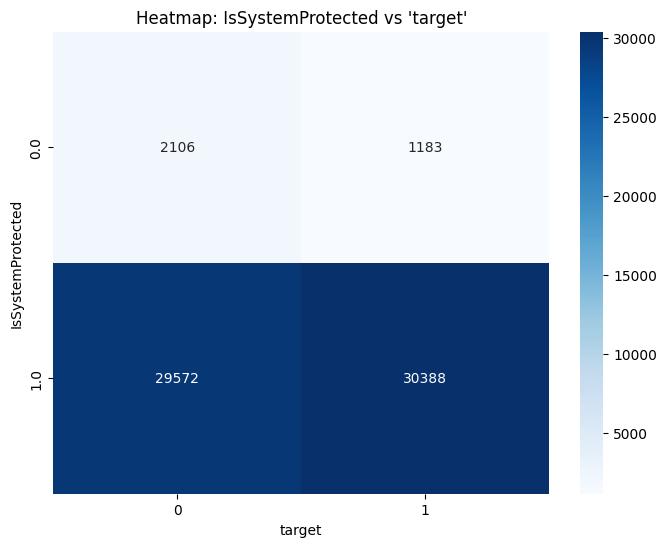

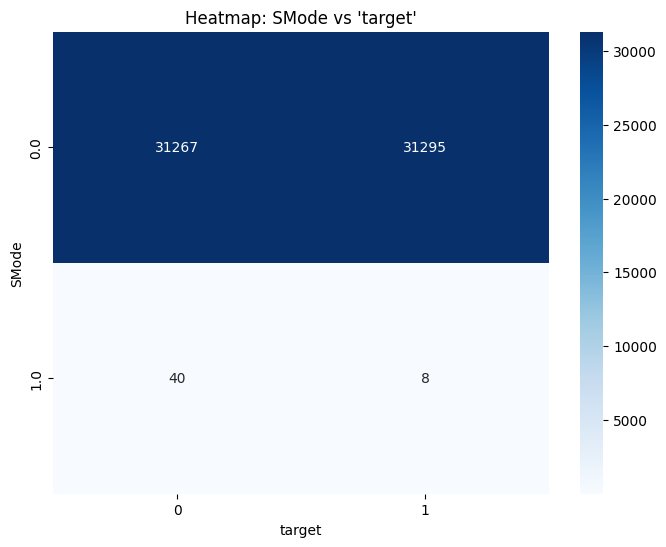

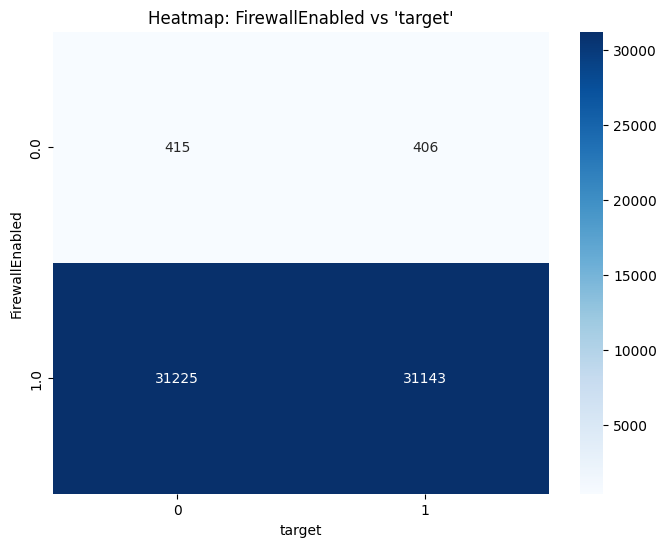

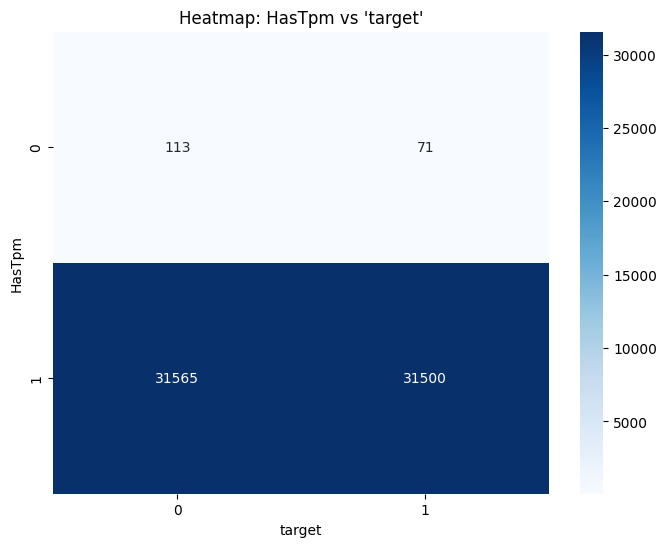

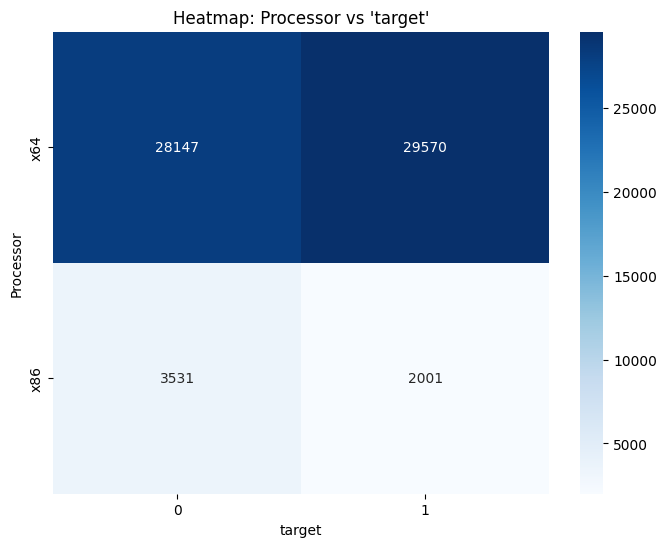

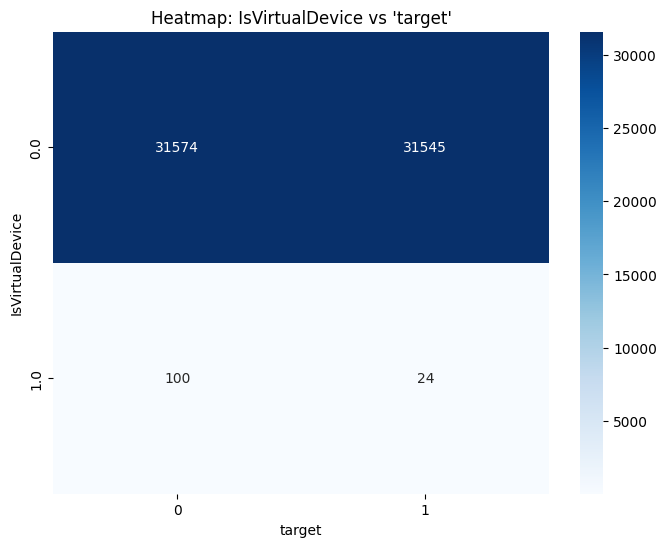

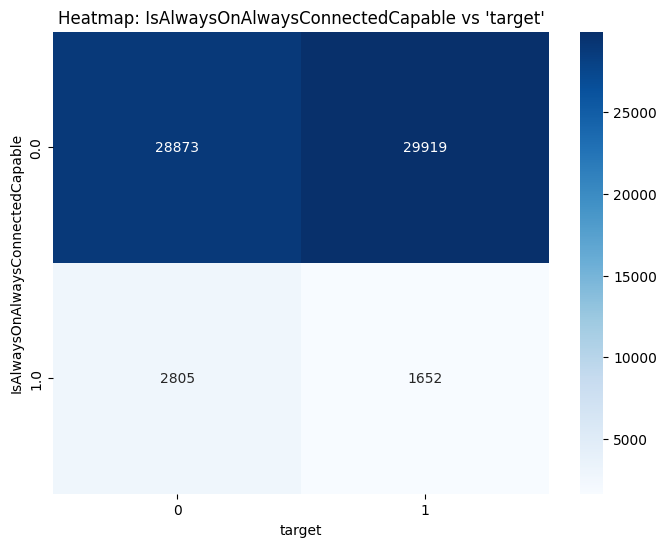

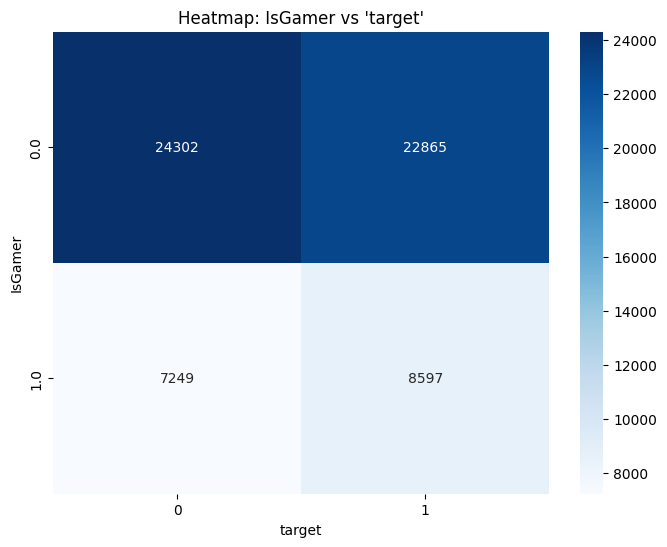

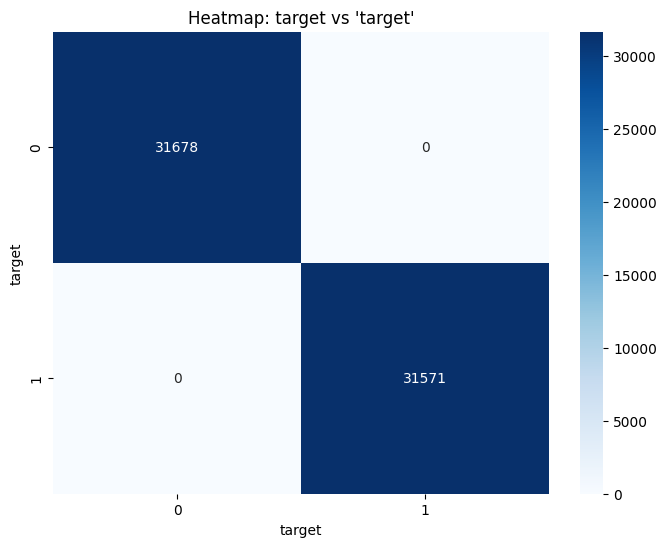

In [134]:
#using heatmap to see association between target and categorical columns.
cat_cols_reduced = ['IsPassiveModeEnabled','IsSystemProtected', 'SMode','FirewallEnabled', 'HasTpm','Processor','IsVirtualDevice', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'target']

for col in cat_cols_reduced:

            heatmap_data = pd.crosstab(df[col], df['target'])
            plt.figure(figsize=(8, 6))
            sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Heatmap: {col} vs 'target'")
            plt.xlabel('target')
            plt.ylabel(col)
            plt.show()
        
            

**Data Preprocessing. (imputation, encoding, Normalization)**

In [135]:
#splitting training data into train and validation set.

from sklearn.model_selection import train_test_split

X = df.drop(columns = ['target'])
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [136]:
#making pipeline for data preprocessing and fitting randomforest model.
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


#for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())])

#for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),  
    ('cat', cat_transformer, cat_cols)])

#preprocessing and fitting in the model.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
    ('classifier', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)


#transforming and saving for further use.
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
X_val_transformed = pipeline.named_steps['preprocessor'].transform(X_val)
X_test_transformed = pipeline.named_steps['preprocessor'].transform(test_df)

In [137]:
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
test_predictions = pipeline.predict(test_df)


Validation Accuracy: 0.5982608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.61      6331
           1       0.60      0.57      0.59      6319

    accuracy                           0.60     12650
   macro avg       0.60      0.60      0.60     12650
weighted avg       0.60      0.60      0.60     12650



In [138]:
#encoding gives sparse matrix and to fit model, converting it to numpy array.
X_train_final = X_train_transformed.toarray()
X_val_final = X_val_transformed.toarray()
y_train_final = np.array(y_train)  
y_val_final = np.array(y_val)  
X_test_final = X_test_transformed.toarray()


**Model 1**

In [139]:
#model1
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold



rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

#hyperparamater tuning to find best parameters.
param_dist = {
    'n_estimators': [100, 300],  
    'criterion': ['gini', 'entropy'], 
    'max_depth': [10, 20],  
    'min_samples_split': [5, 10],  
    'min_samples_leaf': [2, 4],  
    'max_features': ['sqrt', 'log2'],  
    'bootstrap': [True, False]  
}

#using kfold cross validation.
kf = KFold(n_splits=3, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=5,  
    cv=kf,
    scoring='roc_auc',  
    n_jobs= 2,
    random_state=42,
    verbose=2
)


random_search.fit(X_train_final, y_train_final)

#obtaining the best parameters and fitting it once again in the training data to get best model.
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42, n_jobs=-1)
best_rf_model.fit(X_train_final, y_train_final)

y_test_pred = best_rf_model.predict(X_test_final)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best Score: 0.6426445462027494


--- Random Forest Performance ---
Accuracy: 0.6073
Precision: 0.5962
Recall: 0.6623
F1 Score: 0.6275
ROC-AUC Score: 0.6429

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.55      0.58      6331
           1       0.60      0.66      0.63      6319

    accuracy                           0.61     12650
   macro avg       0.61      0.61      0.61     12650
weighted avg       0.61      0.61      0.61     12650



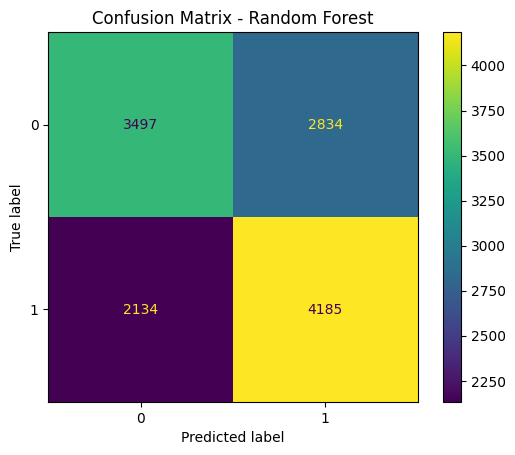

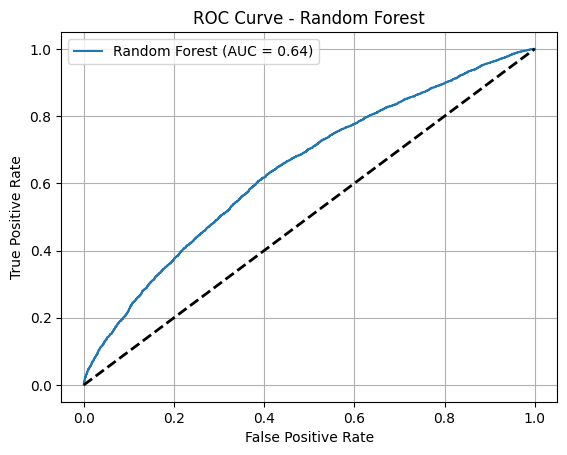

In [140]:
#evaluating our model's performance.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Predictions
rf_pred = best_rf_model.predict(X_val_final)  
rf_prob = best_rf_model.predict_proba(X_val_final)[:, 1] 

# Metrics
print("--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_val_final, rf_pred):.4f}")
print(f"Precision: {precision_score(y_val_final, rf_pred):.4f}")
print(f"Recall: {recall_score(y_val_final, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_val_final, rf_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val_final, rf_prob):.4f}")
print("\nClassification Report:\n", classification_report(y_val_final, rf_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val_final, rf_pred)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_val_final, rf_prob)
rf_auc = auc(rf_fpr, rf_tpr)


plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


**Model 2**

In [141]:
#model2
import xgboost as xgb


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

#hyper-parameter tuning.
param_dist = {
    'n_estimators': [100, 200, 300],  
   'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [ 7, 10, 15],  
    'min_child_weight': [ 3, 5, 7],  
    'gamma': [0, 0.1, 0.2, 0.3],  
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  
}

random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist,
    n_iter=5,  
    scoring='roc_auc',
    cv=3,  
    verbose=1,  
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_final, y_train_final)



best_xgb = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)
best_xgb.fit(X_train_final, y_train_final)
y_test_pred = best_xgb.predict(X_test_final)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}


--- XGB Performance ---
Accuracy: 0.6174
Precision: 0.6152
Recall: 0.6249
F1 Score: 0.6200
ROC-AUC Score: 0.6601

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61      6331
           1       0.62      0.62      0.62      6319

    accuracy                           0.62     12650
   macro avg       0.62      0.62      0.62     12650
weighted avg       0.62      0.62      0.62     12650



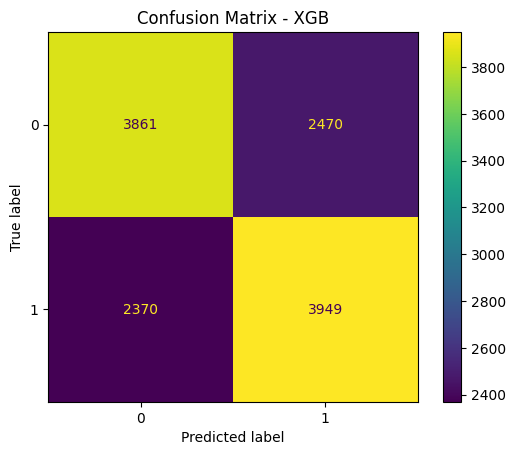

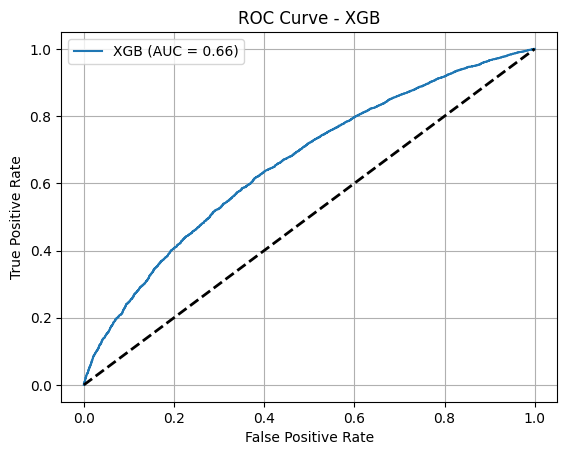

In [142]:
#predictions
xgb_pred = best_xgb.predict(X_val_final)  
xgb_prob = best_xgb.predict_proba(X_val_final)[:, 1]  

#metrics
print("--- XGB Performance ---")
print(f"Accuracy: {accuracy_score(y_val_final, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_val_final, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_val_final, xgb_pred):.4f}")
print(f"F1 Score: {f1_score(y_val_final, xgb_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val_final, xgb_prob):.4f}")
print("\nClassification Report:\n", classification_report(y_val_final, xgb_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val_final, xgb_pred)
plt.title("Confusion Matrix - XGB")
plt.show()

# ROC Curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_val_final, xgb_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)


plt.plot(xgb_fpr, xgb_tpr, label=f"XGB (AUC = {xgb_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - XGB")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


**Model 3**

In [143]:
#model3
!pip install --upgrade lightgbm
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping
!pip install --upgrade lightgbm bayesian-optimization
from bayes_opt import BayesianOptimization

# Train LightGBM with early stopping
model = LGBMClassifier(n_estimators=500, learning_rate=0.05, random_state=42)

model.fit(
    X_train_final, y_train_final, 
    eval_set=[(X_val_final, y_val_final)], 
    eval_metric='logloss',  
    callbacks=[early_stopping(10)] 
)

# Predictions
y_pred = model.predict(X_val_final)

# Bayesian Optimization function
def lgb_eval(num_leaves, learning_rate, max_depth, subsample, colsample_bytree):
    model = LGBMClassifier(
        num_leaves=int(num_leaves),
        learning_rate=learning_rate,
        max_depth=int(max_depth),
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=100,
        random_state=42
    )
    model.fit(X_train_final, y_train_final, eval_set=[(X_val_final, y_val_final)], 
              callbacks=[early_stopping(10)])
    
    y_pred = model.predict(X_val_final)
    return accuracy_score(y_val_final, y_pred)  

# Define the parameter search space
bounds = {
    'num_leaves': (20,100),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 30),
    'subsample': (0.05, 1.0),
    'colsample_bytree': (0.05, 1.0)
}


optimizer = BayesianOptimization(f=lgb_eval, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=20)

print("Best Parameters Found:", optimizer.max)

best_params = optimizer.max['params']

# Converting into integers when necessary.
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['max_depth'] = int(best_params['max_depth'])

print("Best Parameters:", best_params)

final_lgbm = LGBMClassifier(
    num_leaves=best_params['num_leaves'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    n_estimators=500,  
    random_state=42
)

final_lgbm.fit(
    X_train_final, y_train_final,
    eval_set=[(X_val_final, y_val_final)],
    eval_metric="logloss",
    callbacks=[early_stopping(10)]
)


y_test_pred = final_lgbm.predict(X_test_final)


[LightGBM] [Info] Number of positive: 25252, number of negative: 25347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.310431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4388
[LightGBM] [Info] Number of data points in the train set: 50599, number of used features: 2057
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499061 -> initscore=-0.003755
[LightGBM] [Info] Start training from score -0.003755
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[161]	valid_0's binary_logloss: 0.651017
|   iter    |  target   | colsam... | learni... | max_depth | num_le... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 25252, number of negative: 25347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

--- lightGBM Performance ---
Accuracy: 0.6215
Precision: 0.6226
Recall: 0.6153
F1 Score: 0.6189
ROC-AUC Score: 0.6639

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      6331
           1       0.62      0.62      0.62      6319

    accuracy                           0.62     12650
   macro avg       0.62      0.62      0.62     12650
weighted avg       0.62      0.62      0.62     12650



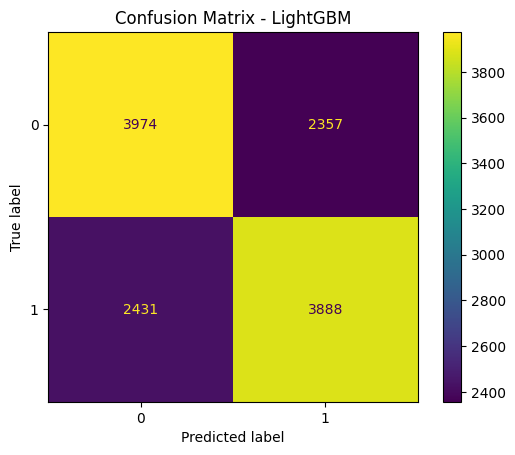

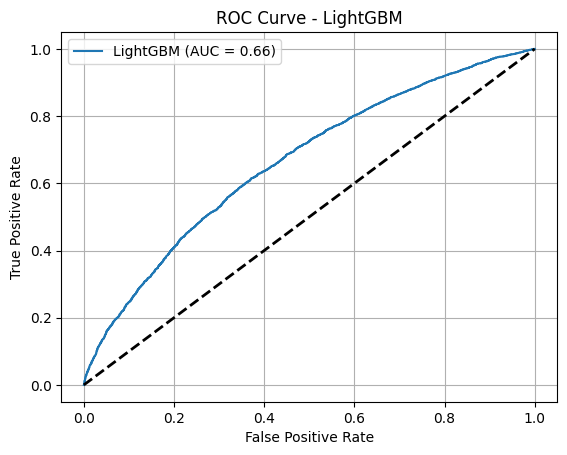

In [144]:
#predictions
lgbm_pred = final_lgbm.predict(X_val_final)  
lgbm_prob = final_lgbm.predict_proba(X_val_final)[:, 1]  

#metrics
print("--- lightGBM Performance ---")
print(f"Accuracy: {accuracy_score(y_val_final, lgbm_pred):.4f}")
print(f"Precision: {precision_score(y_val_final, lgbm_pred):.4f}")
print(f"Recall: {recall_score(y_val_final, lgbm_pred):.4f}")
print(f"F1 Score: {f1_score(y_val_final, lgbm_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_val_final, lgbm_prob):.4f}")
print("\nClassification Report:\n", classification_report(y_val_final, lgbm_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_val_final, lgbm_pred)
plt.title("Confusion Matrix - LightGBM")
plt.show()

# ROC Curve
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_val_final, lgbm_prob)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)


plt.plot(lgbm_fpr, lgbm_tpr, label=f"LightGBM (AUC = {lgbm_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


In [145]:

# Creating a comparison dataframe
model_comparison = {
    "Model": ["Random Forest", "LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_val_final, rf_pred),
        accuracy_score(y_val_final, lgbm_pred),
        accuracy_score(y_val_final, xgb_pred)
    ],
    "Precision": [
        precision_score(y_val_final, rf_pred),
        precision_score(y_val_final, lgbm_pred),
        precision_score(y_val_final, xgb_pred)
    ],
    "Recall": [
        recall_score(y_val_final, rf_pred),
        recall_score(y_val_final, lgbm_pred),
        recall_score(y_val_final, xgb_pred)
    ],
    "F1 Score": [
        f1_score(y_val_final, rf_pred),
        f1_score(y_val_final, lgbm_pred),
        f1_score(y_val_final, xgb_pred)
    ],
    "ROC-AUC": [
        roc_auc_score(y_val_final, rf_prob),
        roc_auc_score(y_val_final, lgbm_prob),
        roc_auc_score(y_val_final, xgb_prob)
    ]
}

comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)


           Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Random Forest  0.607273   0.596239  0.662288  0.627530  0.642866
1       LightGBM  0.621502   0.622578  0.615287  0.618911  0.663870
2        XGBoost  0.617391   0.615205  0.624941  0.620035  0.660149


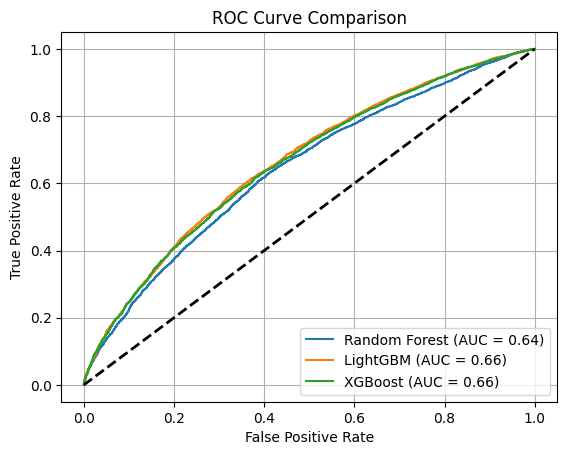

In [146]:
# Random Forest ROC
rf_fpr, rf_tpr, _ = roc_curve(y_val_final, rf_prob)
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")

# LightGBM ROC
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_val_final, lgbm_prob)
lgbm_auc = auc(lgbm_fpr, lgbm_tpr)
plt.plot(lgbm_fpr, lgbm_tpr, label=f"LightGBM (AUC = {lgbm_auc:.2f})")

# XGBoost ROC
xgb_fpr, xgb_tpr, _ = roc_curve(y_val_final, xgb_prob)
xgb_auc = auc(xgb_fpr, xgb_tpr)
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [147]:
#creating a submission file.
submission = pd.DataFrame( { "id" : range(0, test_df.shape[0]),
                           "target" : y_test_pred})
submission.to_csv('submission.csv', index = False)

In [148]:
#ensuring the shape.
submission.shape

(10000, 2)

In [1]:
sub = pd.read_csv('/kaggle/working/submission.csv')
sub.head()

NameError: name 'pd' is not defined